# Resume Screening Bot
This notebook demonstrates the full pipeline for building a resume classification model.

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
df = pd.read_csv("../data/synthetic_resumes.csv")
df.head()

,Resume_Text,Job_Fit
0,"Experienced data scientist skilled in Python, ...",Data Science
1,"Frontend developer with React, HTML, CSS, and ...",Frontend
2,"Data analyst proficient in Power BI, Tableau, ...",Data Analyst
3,"Backend engineer experienced in Java, Spring B...",Backend
4,Business analyst with strong domain knowledge ...,Business Analyst


## Exploratory Data Analysis

In [4]:
df['Job_Fit'].value_counts()

Job_Fit
Backend             2
Data Science        1
Frontend            1
Data Analyst        1
Business Analyst    1
QA                  1
ML Engineer         1
Content             1
DevOps              1
Name: count, dtype: int64

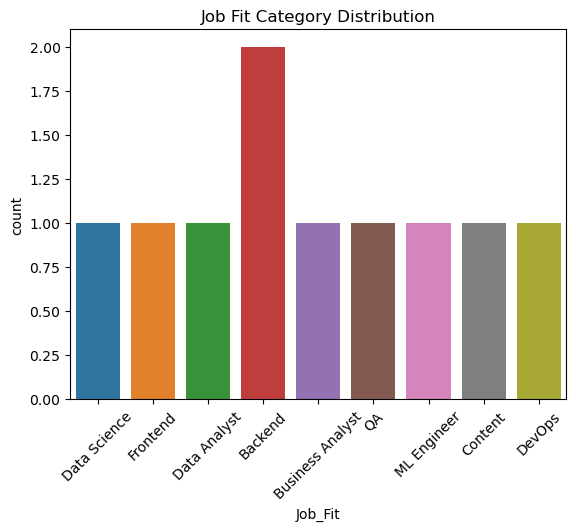

In [5]:
sns.countplot(data=df, x='Job_Fit')
plt.title("Job Fit Category Distribution")
plt.xticks(rotation=45)
plt.show()

##  Preprocessing and Model Training

In [6]:
X = df["Resume_Text"]
y = df["Job_Fit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

## Model Evaluation

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Backend       0.00      0.00      0.00       0.0
     Content       0.00      0.00      0.00       1.0
    Frontend       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classif

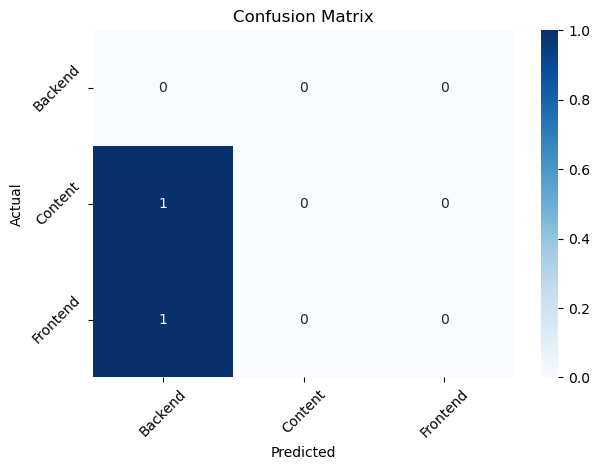

In [9]:
from sklearn.utils.multiclass import unique_labels

# Safer label extraction
labels = unique_labels(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

# Plot
sns.heatmap(conf_mat, annot=True, fmt='d', 
            xticklabels=labels, yticklabels=labels,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## Save Trained Model

In [ ]:
import os
os.makedirs("model", exist_ok=True)
with open("model/resume_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)